<a href="https://colab.research.google.com/github/j0ngle/Machine-Learning-Projects/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing our data

We are going to build a simple image classifier based on the fashion_mnist dataset. fashion_mnist is a very popular toy dataset that has 10 unique classes:



```
['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
```


Let's start by downloading the data using: `keras.datasets.fashion_mnist.load_data()`

Below, `train_images` will refer to the images we are going to use to train our neural network. Similarly `test_images` will be the ones we use to test it after training. `train_labels` and `test_labels` are the labels associated with each image. These are represented as integers which are used to index the `classes` list containing the actual label names.

We'll use the `shape` attribute to find out a bit more information on our data

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)

classes = ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


You'll notice that there are 60000 training images, each of which are 28x28 pixels. There are also 60000 training labels indicating that we have a label for each image in the dataset

---

There are two ways to store images on a computer: grayscale and rgb. The ones we are working with today are grayscale.

What's the difference?

Each pixel in an RGB image is stored as a list of three numbers `[R, G, B]`, where each index represents the intensity of the red, green, and blue value respectively.

Grayscale images don't need as much information. Instead of saving the intensity of the red, green, and blue values we can instead store the brightness of each pixel. So instead of each pixel being stored as a 3 element list it can be stored as a single number that represents its brightness.

Now, there is one last preprocessing step we must finish. 

Pixel intensities are stored as a number between 0-255, where 255 represents the most intense value. Neural networks tend to like when values are somewhere between 0-1, so we can "normalize" our images to convert the values to something that our network will like. 

We can do this by simply dividing every pixel by 255. I'll go ahead and print out the pixel values before and after I do this so you can see the difference

In [ ]:
print("Before normalization")
print(train_images[0])

train_images = train_images / 255
test_images = test_images / 255

print("After normalization")
print(train_images[0])

Before normalization
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1  

Now we are ready to build our neural network!

But before we do that, let's write a function that will help us visualize our results better. Here we are going to plot each pixel in our image on a graph and display its correct label underneath.

To do this we'll need `matplotlib.pyplot`

Remember that when displaying our label, simply accessing `train_labels` will give us the integer representation of the label. In order to get the text we will need to use that to index into the `classes` list we made before

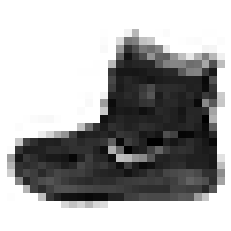

Label: ankle boot


In [ ]:
import matplotlib.pyplot as plt

def show_image(img, label):
  plt.imshow(img, cmap='binary')
  plt.axis('off')
  plt.show()
  print("Label:", label)

show_image(train_images[0], classes[train_labels[0]])

# Let's build the model

Here we are going to build the model. Before we do that, we need to establish what everything is and what it's doing.

`models.keras.Sequential` - Defines the Sequential API. This just says we are going to pass our data straight through the network and that we aren't going to need the ability to send it our of order at all. It takes a `list` of layers as its input.

`keras.layers.Flatten` - Our images are stored as 2D arrays of pixels, but our neural network is expecting a 1D array. This layer takes care of converting out picture into a single array to be passed into the next layer

`keras.layers.Dense` - This is the most basic layer. It is a simply fully connected layer, meaning the output of every neuron in a layer is mapped to every neuron in the next layer

ReLU and Softmax - Common activation functions used in most networks

To define the model, we simply pass in a list of our layers. You can probably gather what all the inputs mean. For the most part the number of neurons we choose for each layer is aribtrary with the exception being the output layer. 

The output *must* have the same number of neurons as we have possible output classes. In the case of the fashion mnist dataset we have 10

In [ ]:
# We'll start by creating a list of our layers in the order that we want 
# the info to be passed through them
layers = [keras.layers.Flatten(input_shape=[28, 28]),
          keras.layers.Dense(300, activation='relu'),
          keras.layers.Dense(100, activation='relu'),
          keras.layers.Dense(10, activation='softmax')]

# Now let's pass our layers as the input to the model
model = keras.models.Sequential(layers)

We can use `summary()` to show the details of all the layers

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


`.compile()` is used to prep our network for training. Here we define our loss function, optimizer, and desired metrics.

sparse_categorical_crossentropy - let's break this down. "Crossentropy" is a type of loss function which essentially figured out the distance our output is from the correct answer. "categorical" suggests we are working with numberical labels which corespond with some category list. By default, categorical crossentropy expects your inputs to be one-hot encoded. Ours are not. Thus we need to specific that our intputs are "sparse"

one-hot encoding - If I remember correctly it works like this. Lets say we have n=4 possible categories (for simplicity). As it stands our labels are numbers that represent each of the 4 outputs. So we could get either a 1, 2, 3, or 4 as output. One-hot converts this into an array with length = n. Now it's a binary problem. So our four options are [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], or [0, 0, 0, 1]

sgd - You don't need to worry about what this is, but if you are interested, it is an optimization technique called "gradient descent" and is brought up the the powerpoint called "Exta info" in the folder that was sent to you :)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

`.fit` just starts the training loop. We pass in our training set, x_train, and our training labels, y_train

epochs - Essentially the amount of times we are going to loop through the whole training loop. So here we are going to run through all of the images 30 times.

validation_split - During training, it is generally bad to test your results with your testing set. Once the model has seen the image in the test set it can end up having a bias toward those images because it's seen them before. Instead, we can use this to create what's called a "validation set". This is just a subset of our training set used for periodic testing to give us feedback on what's going on. It serves as a good estimate of how it'll perform on the testing set without spoiling the test set itself

In [ ]:
history = model.fit(train_images, train_labels, 
                    epochs=20,
                    validation_split=0.08)

Epoch 1/30
1725/1725 [==============================] - 9s 5ms/step - loss: 0.7272 - accuracy: 0.7631 - val_loss: 0.5341 - val_accuracy: 0.8146
Epoch 2/30
1725/1725 [==============================] - 9s 5ms/step - loss: 0.4911 - accuracy: 0.8305 - val_loss: 0.4687 - val_accuracy: 0.8310
Epoch 3/30
1725/1725 [==============================] - 8s 5ms/step - loss: 0.4458 - accuracy: 0.8436 - val_loss: 0.4158 - val_accuracy: 0.8515
Epoch 4/30
1725/1725 [==============================] - 8s 5ms/step - loss: 0.4179 - accuracy: 0.8534 - val_loss: 0.4047 - val_accuracy: 0.8535
Epoch 5/30
1725/1725 [==============================] - 8s 5ms/step - loss: 0.3982 - accuracy: 0.8612 - val_loss: 0.3964 - val_accuracy: 0.8592
Epoch 6/30
1725/1725 [==============================] - 8s 5ms/step - loss: 0.3811 - accuracy: 0.8656 - val_loss: 0.3742 - val_accuracy: 0.8604
Epoch 7/30
1725/1725 [==============================] - 8s 5ms/step - loss: 0.3675 - accuracy: 0.8706 - val_loss: 0.3817 - val_accuracy:

Notice the variable name we stored the results in, `history`. 

History is a neat thing with Keras that automatically saves the results from each epoch. So here we can create a datafrom from the history and plot it.

We would expect the loss to decline overtime and the accuracy to increase.

When analyzing graphs be sure to keep convergence in mind. If you don't know what convergence means it's basically just the graph gradually getting closer and closer to a some value. We don't want the graph to oscillate at all - that suggest something could be wrong with the network, training loop, loss function, optimizer, input preprocessing, etc, etc, etc. 

# Checking our results

Let's start by using that history object we talked about a second ago to see how our network performed

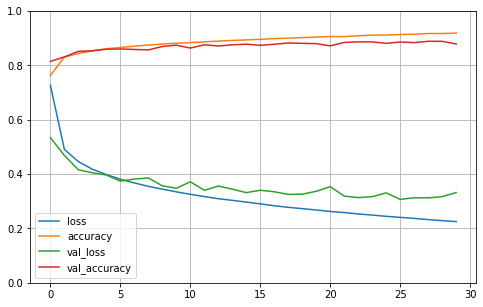

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

As you can see, the accuracy on both our training set and validation set improved over time! Similary our loss went down throughout training which indicates our guesses are closer to correct as we train more

---

Now let's test out model using the testing set we made earlier

To get some predictions, we can call `.predict`. Just pass in the testing set and it'll spit out some predictions - though these may not be exactly what you'd expect.

Say we feed a single image of a tshirt to the model. Instead of spitting out '0' (the index of B in our class list), instead it will give us a list of 10 elements. Each of these elements correspond to a certainty that that index is the correct one. So it'll look something like this:

[0.04, .98, .23, .01, .06, .10, ...]

So we need a way to grab the index with the highest certainty. Luckily `np.argmax` exists. This is a numpy function that just gives you the index of the largest element.

In [ ]:
pred = model.predict(test_images)
print(pred)

pred = np.argmax(pred, axis=-1)
print(pred)

[[1.8119879e-05 6.6368592e-08 2.8799775e-05 ... 2.3052603e-02
  5.6192069e-04 9.6591318e-01]
 [2.1146987e-05 1.3196853e-10 9.9905938e-01 ... 4.3918407e-16
  7.3569959e-09 2.1951227e-13]
 [1.4566573e-05 9.9998426e-01 1.1412222e-07 ... 8.5983998e-12
  3.3214897e-09 4.0204287e-13]
 ...
 [3.4142870e-03 1.1289840e-07 1.8451545e-04 ... 1.5324391e-06
  9.9604344e-01 6.9363914e-08]
 [3.8225844e-06 9.9994063e-01 9.3048828e-07 ... 4.6662471e-08
  1.7669552e-07 1.4806261e-08]
 [4.6373458e-05 1.8540289e-06 3.2526752e-04 ... 5.7388553e-03
  1.5217798e-03 3.9915580e-05]]
[9 2 1 ... 8 1 5]


Now we have an array of index predictions and an array of labels. Now it's super easy to determine the accuracy. We can just compare each index of our prediction list to the same index in our label list and bang, we have an accuracy.

In [ ]:
total = 0
correct = 0
for i in range(0, len(test_labels)):
  total += 1

  if (pred[i] == test_labels[i]):
    correct += 1

print("Accuracy:", correct / total)

Accuracy: 0.8757


Finally let's just display a few of our results because it is always fun to have a visual

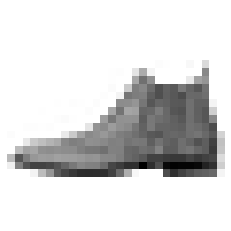

Label: ankle boot
Pred: ankle boot


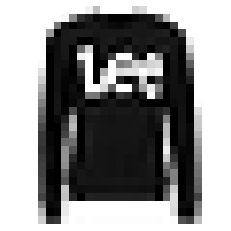

Label: pullover
Pred: pullover


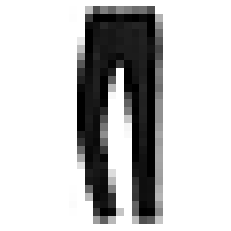

Label: trouser
Pred: trouser


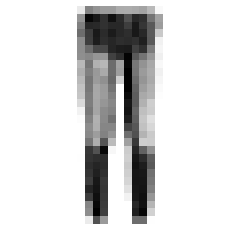

Label: trouser
Pred: trouser


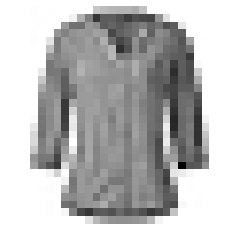

Label: shirt
Pred: shirt


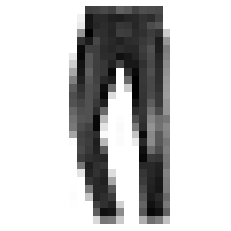

Label: trouser
Pred: trouser


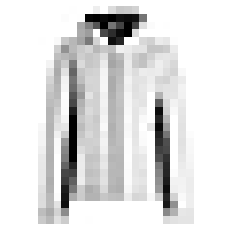

Label: coat
Pred: coat


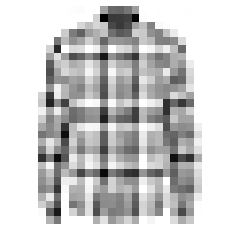

Label: shirt
Pred: shirt


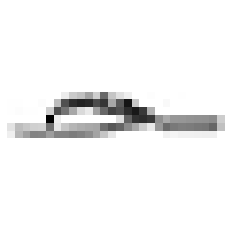

Label: sandal
Pred: sandal


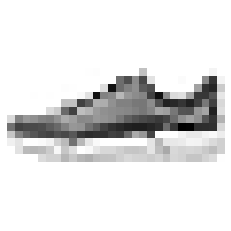

Label: sneaker
Pred: sneaker


In [ ]:
for i in range(0, 10):
  show_image(test_images[i], classes[test_labels[i]])
  print("Pred:", classes[pred[i]])